## Corn Disease Classification

The aim of this project is to buil models (specifically neural networks) that are able to classify images of corn leaves based on a specific disease.

The different diseases are:
- **Blight**: foliar disease of corn (maize) caused by a parasite. With its characteristic cigar-shaped lesions, this disease can cause significant yield loss in susceptible corn hybrids;
- **Common Rust**: caused by the a fungus and occurs every growing season. It is seldom a concern in hybrid corn. Early symptoms of common rust are chlorotic flecks on the leaf surface;
- **Gray Leaf Spot**: it is a foliar fungal disease that affects maize. GLS is considered one of the most significant yield-limiting diseases of corn worldwide. There are two fungal pathogens that cause GLS. Symptoms seen on corn include leaf lesions, discoloration (chlorosis), and foliar blight;
- **Healthy**: this is not properly a disease but in order to make an all around classification there has been included also the healthy leaves.

After briefly discussing some tecnical aspects about biology let's jump into something more interesting for us.

We started with a folder, divided into subfolders, containing the different leaf images divided according to the disease. The first step was to build an actual dataset.

## Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance
from PIL.ImageOps import crop, flip, mirror
import os
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
RANDOM_STATE = 42 # setting a constant random state for every methos that uses randomization

In [3]:
def create_data():
    name = ['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']
    final_images = []
    final_labels = []

    for disease in name:
        folder_path = 'Corn Images/' + disease
        images = []
        labels = [disease] * len(os.listdir(folder_path))

        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)
            img = Image.open(img_path)
            images.append(img)

        final_images.extend(images)
        final_labels.extend(labels)

    return final_images, final_labels

In [4]:
result = create_data()
dataset = pd.DataFrame({'Image': result[0], 'Label': result[1]})

In [5]:
# a check to see if all the images have been loaded
print(dataset[dataset['Label'] == 'Blight'].count())
print(dataset[dataset['Label'] == 'Common_Rust'].count())
print(dataset[dataset['Label'] == 'Gray_Leaf_Spot'].count())
print(dataset[dataset['Label'] == 'Healthy'].count())

Image    1146
Label    1146
dtype: int64
Image    1306
Label    1306
dtype: int64
Image    574
Label    574
dtype: int64
Image    1162
Label    1162
dtype: int64


In [6]:
dataset.head(10)

,Image,Label
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Blight
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Blight
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Blight
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Blight
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Blight
5,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Blight
6,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Blight
7,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Blight
8,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Blight
9,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Blight


## Data Visualization

In [7]:
def show_image(image):
    image = image.copy()
    plt.imshow(image, aspect='equal')

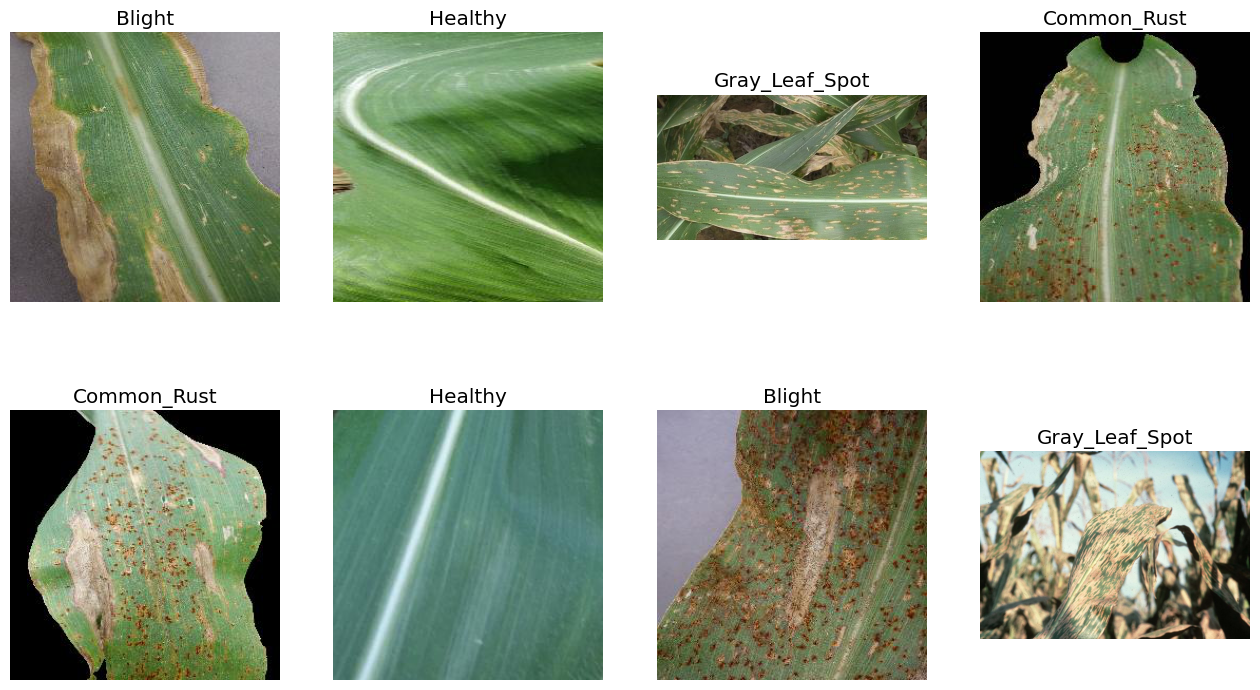

In [8]:
rng = np.random.default_rng(RANDOM_STATE)
n_cols = 4
n_rows = 2
indexes = rng.choice(len(dataset), n_cols * n_rows)

plt.figure(figsize=(16, 9))

for ii, id in enumerate(indexes, 1):
    plt.subplot(n_rows, n_cols, ii)
    image = dataset['Image'][int(id)]
    show_image(image)
    plt.title(dataset['Label'][int(id)])
    plt.axis('off')

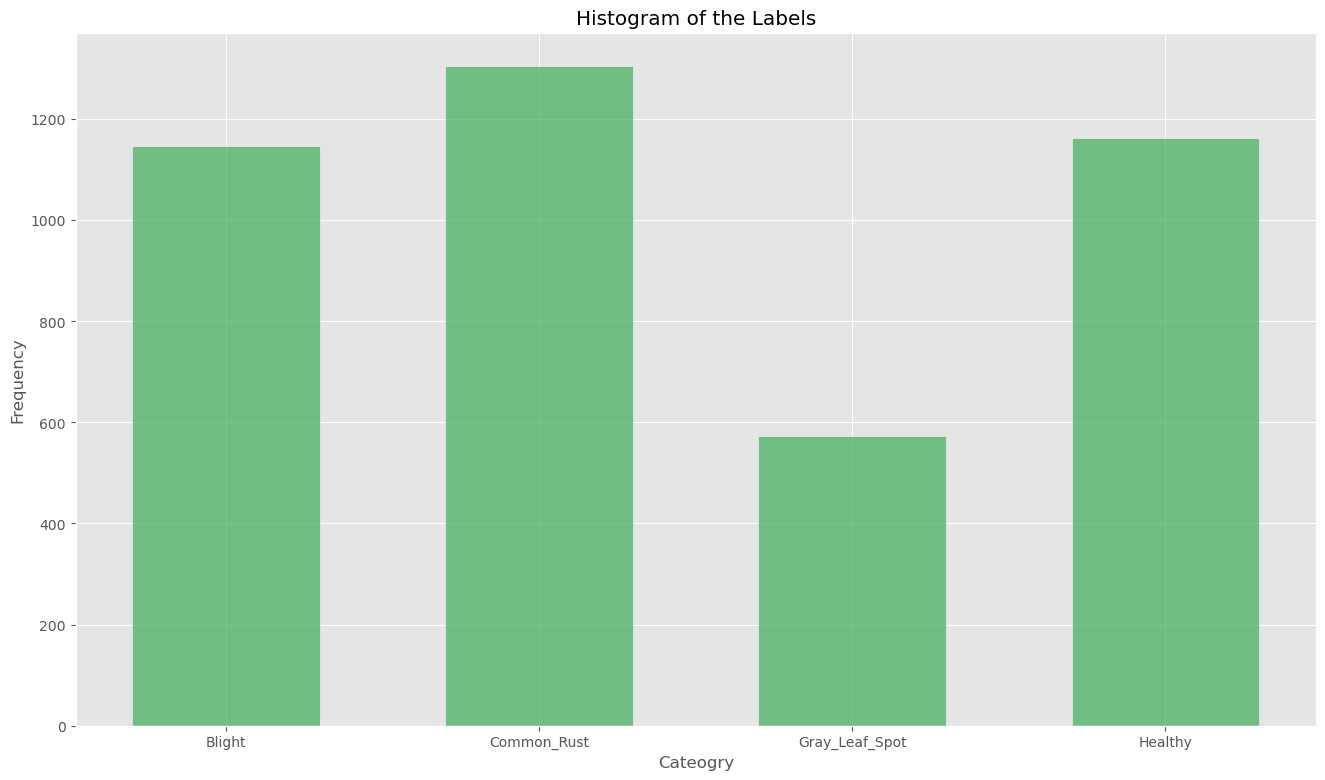

In [9]:
palette = sns.color_palette('Greens', 4)

plt.figure(figsize=(16, 9))
sns.histplot(dataset['Label'], bins=4, shrink=0.6, kde=False, color=palette[2])

plt.xlabel('Cateogry')
plt.ylabel('Frequency')
plt.title('Histogram of the Labels')

# Show the plot
plt.show()

In [10]:
x = dataset[['Image', 'Label']] # using another variable to leave the original dataset intact

## Data Preparation

After spending some time trying to understand why we couldn't train our model, we finally understood why: few images were not in a RGB (we take it for granted since they finding an image with another format is not very usual) but they were stored in RGBA or CMYK so they had 4 channels. We found them and converted in RGB to leave the size and all the other computations intact.

In [11]:
for i in range(len(x)):
    im = x["Image"][i]
    if im.mode != "RGB":
        print(im.mode, "Index:", i, end=" --> ")
        x["Image"][i] = x["Image"][i].convert("RGB")
        print("Converted in RGB")

RGBA Index: 1395 --> Converted in RGB
RGBA Index: 1859 --> Converted in RGB
RGBA Index: 2196 --> Converted in RGB
RGBA Index: 2549 --> Converted in RGB
CMYK Index: 2993 --> Converted in RGB


In [12]:
X_train, X_val, y_train, y_val = train_test_split(x['Image'], x['Label'], 
                                                  test_size=0.2, 
                                                  random_state=RANDOM_STATE, 
                                                  shuffle=True, 
                                                  stratify=x['Label'])

In [13]:
print('X_train shape:', X_train.shape)
print('X_val shape:', X_val.shape)
print('y_train shape:', y_train.shape)
print('y_val shape:', y_val.shape)

X_train shape: (3350,)
X_val shape: (838,)
y_train shape: (3350,)
y_val shape: (838,)


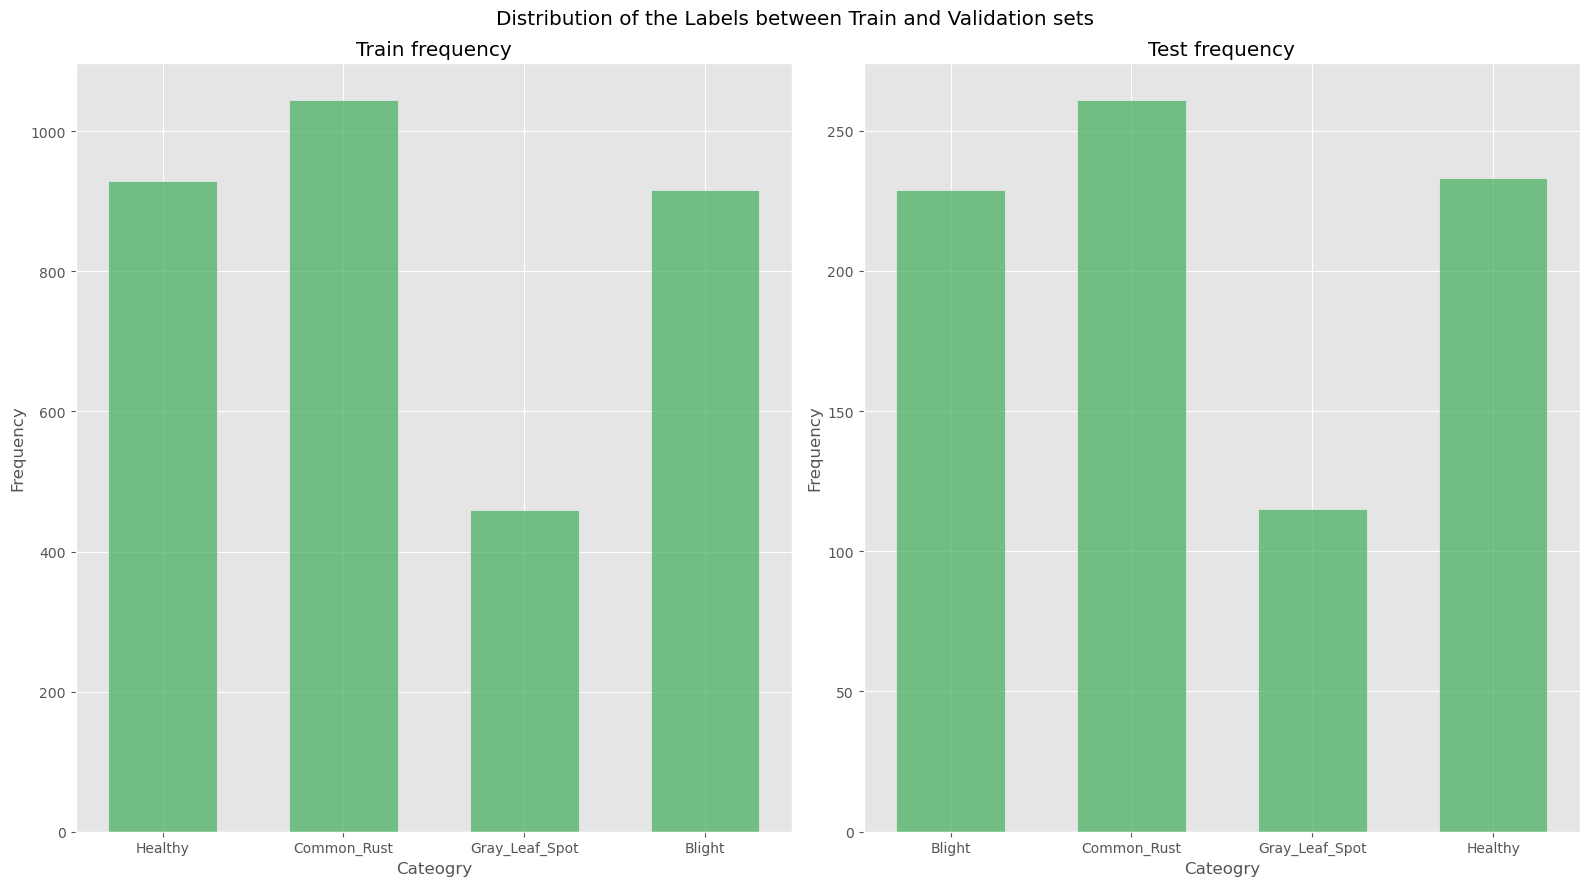

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 9), tight_layout=True)

sns.histplot(y_train, bins=4, shrink=0.6, kde=False, color=palette[2], ax=ax1)

ax1.set_xlabel('Cateogry')
ax1.set_ylabel('Frequency')
ax1.set_title('Train frequency')

sns.histplot(y_val, bins=4, shrink=0.6, kde=False, color=palette[2], ax=ax2)

ax2.set_xlabel('Cateogry')
ax2.set_ylabel('Frequency')
ax2.set_title('Test frequency')

plt.suptitle('Distribution of the Labels between Train and Validation sets', size='x-large')


# Show the plot
plt.show()

As we can see adding the stratify attribute to the split wa ssuccessful since the numbers of labels per disease has remained equal between the two sets

## Data Augmentation

In [15]:
np.random.seed(RANDOM_STATE)

In [16]:
def Resize(content):
    return content.resize((224, 224))

In [17]:
def RandomRotation(content):
    p = 0.2
    if np.random.random() < p:
        return content.rotate(np.random.randint(-45, 45))
    else:
        return content

In [18]:
def RandomHorizontalFlip(content):
    p = 0.2
    if np.random.random() < p:
        return mirror(content)
    else:
        return content

In [19]:
def RandomVerticalFlip(content):
    p = 0.2
    if np.random.random() < p:
        return flip(content)
    else:
        return content

In [20]:
def RandomZoom(content):
    p = 0.2
    if np.random.random() < p:
        cropped = crop(content, np.random.randint(0, 50))
        return cropped.resize((224, 224))
    else:
        return content

In [21]:
def AdjustContrast(content):
    p = 0.2
    if np.random.random() < p:
        return ImageEnhance.Contrast(content).enhance(np.random.uniform(0.5, 1.5))
    else:
        return content

In [22]:
def AdjustBrightness(content):
    p = 0.2
    if np.random.random() < p:
        return ImageEnhance.Brightness(content).enhance(np.random.uniform(0.5, 1.5))
    else:
        return content

In [23]:
def DataAugmentation(content):
    content = RandomRotation(content)
    content = RandomHorizontalFlip(content)
    content = RandomVerticalFlip(content)
    content = RandomZoom(content)
    content = AdjustContrast(content)
    content = AdjustBrightness(content)
    return content

In [24]:
X_train = X_train.apply(Resize)
X_val = X_val.apply(Resize)

In [25]:
X_train = X_train.apply(DataAugmentation)

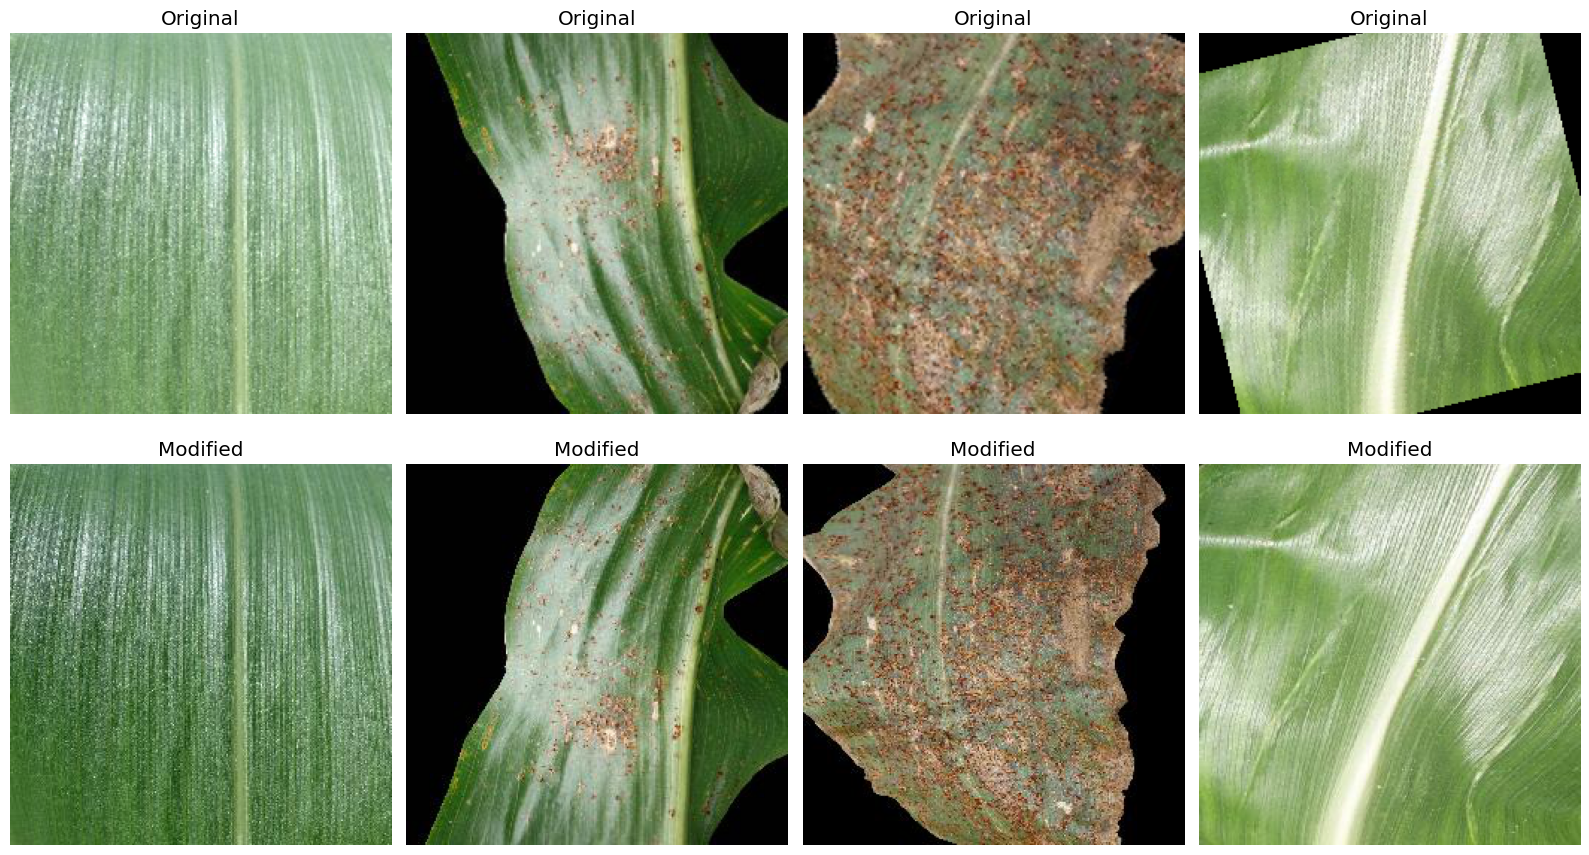

In [26]:
n_rows = 2  
n_cols = 4
index_total = X_train.index
indexes = index_total[:5]

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16,9), tight_layout=True)

for i in range(n_cols):
    ax = axes[0, i]
    ax.imshow(X_train[indexes[i]])
    ax.set_title("Original")
    ax.axis("off")
    
    ax = axes[1, i]
    ax.imshow(x["Image"][indexes[i]])
    ax.set_title("Modified")
    ax.axis("off")

plt.show()

In [27]:
def ToNumpy(content):
    return np.asarray(content, dtype=np.float32)

In [28]:
X_train = X_train.apply(ToNumpy)
X_val = X_val.apply(ToNumpy)

In [29]:
def Rescaling(content):
    return content / 255.0

In [30]:
X_train = X_train.apply(Rescaling)
X_val = X_val.apply(Rescaling)

In [31]:
X_train = X_train.values
X_val = X_val.values
y_val = y_val.values
y_train = y_train.values

Here we basically converted the pandas series into a numpy array in order to have less problem when passing to the modelling

## Data Modelling

In [32]:
import sklearn
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras import Input

from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import plot_model

2024-01-31 13:54:08.273657: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [33]:
trainX = []
for im in X_train:
    trainX.append(im)
trainX = np.array(trainX)

In [35]:
valX = []
for im in X_val:
    valX.append(im)
valX = np.array(valX)

In [37]:
print(trainX.shape)
print(valX.shape)

(3350, 224, 224, 3)
(838, 224, 224, 3)


In [38]:
enc = OneHotEncoder()

Y_train = enc.fit_transform(y_train[:, np.newaxis]).toarray()
Y_val = enc.transform(y_val[:, np.newaxis]).toarray()

In [39]:
input_shape = (224, 224, 3)

In [41]:
classifier = Sequential()

classifier.add(Input(shape=input_shape))

classifier.add(Conv2D(16, (3, 3), input_shape=input_shape, activation='relu', kernel_initializer='random_normal', strides=(1, 1), name = 'conv2D16'))
classifier.add(MaxPooling2D(pool_size=(2, 2), name = 'maxpooling2D'))

classifier.add(Conv2D(32, (3, 3), input_shape=input_shape, activation='relu', kernel_initializer='random_normal', strides=(1, 1), name = 'conv2D32'))
classifier.add(MaxPooling2D(pool_size=(2, 2), name = 'maxpooling2D1'))

classifier.add(Conv2D(64, (3, 3), input_shape=input_shape, activation='relu', kernel_initializer='random_normal', strides=(1, 1), name = 'conv2D64'))
classifier.add(MaxPooling2D(pool_size=(2, 2), name = 'maxpooling2D2'))

classifier.add(Conv2D(128, (3, 3), input_shape=input_shape, activation='relu', kernel_initializer='random_normal', strides=(1, 1), name = 'conv2D128'))
classifier.add(MaxPooling2D(pool_size=(2, 2), name = 'maxpooling2D3'))

classifier.add(Dropout(0.5, name = 'dropout'))

classifier.add(Flatten(name = 'flatten'))

classifier.add(Dense(units=4, activation='softmax', kernel_initializer='random_normal', name = 'Softmaxdense'))


classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2D16 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 maxpooling2D (MaxPooling2D)  (None, 111, 111, 16)     0         
                                                                 
 conv2D32 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 maxpooling2D1 (MaxPooling2D  (None, 54, 54, 32)       0         
 )                                                               
                                                                 
 conv2D64 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 maxpooling2D2 (MaxPooling2D  (None, 26, 26, 64)       0         
 )                                                    

In [ ]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor="accuracy", min_delta=0.001, mode="max")
]

classifier.fit(X_train, Y_train, batch_size=32, epochs=100, verbose=1, callbacks=callbacks)

In [ ]:
classifier.save("corn_disease_classifier100.keras")